In [1]:
import torch 
import numpy as np
import pandas as pd
import time as time


In [2]:
from utils import charge_data

In [3]:
hyper_param = {
    "H": [
        261.397,
    ],
    "ya0": [
        0.00625,
    ],
    "m": 1.57,
    "file": [
        "data_john_7_case_1.csv",
    ],
    "nb_epoch": 1000,
    "save_rate": 10,
    "dynamic_weights": True,
    "lr_weights": 0.1,
    "weight_data": 0.5,
    "weight_border": 0.5,
    "batch_size": 10000,
    "nb_points_pde": 1000000,
    "Re": 100,
    "lr_init": 3e-4,
    "gamma_scheduler": 0.999,
    "nb_layers": 10,
    "nb_neurons": 64,
    "n_pde_test": 5000,
    "n_data_test": 5000,
    "nb_points": 130,
    "x_min": -0.06,
    "x_max": 0.06,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "nb_period": 20,
    "u_border": True,
    "v_border": False,
    "p_border": True,
    "r_min": 0.027/2,
    'theta_border_min': 0.05


}

In [4]:
param_adim = {"V": 1.0, "L": 0.025, "rho": 1.2}

In [5]:
(
    X_train,
    U_train,
    X_full,
    U_full,
    X_border_train,
    U_border_train,
    X_border_test,
    U_border_test,
    mean_std,
    X_test_data,
    U_test_data,
) = charge_data(hyper_param, param_adim)

fichier n°0 chargé
Starting X_train
Simu n°0/1
Time:7.363
X_train OK


In [14]:
import matplotlib.pyplot as plt

In [15]:
masque_x_train

NameError: name 'masque_x_train' is not defined

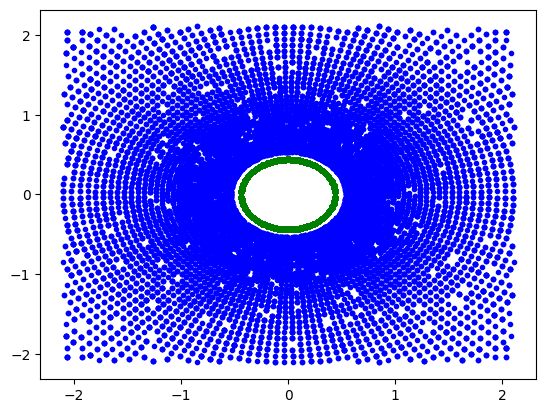

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker = '.', color='b')
plt.scatter(X_border_train[:, 0], X_border_train[:, 1], marker = '.', color='g')

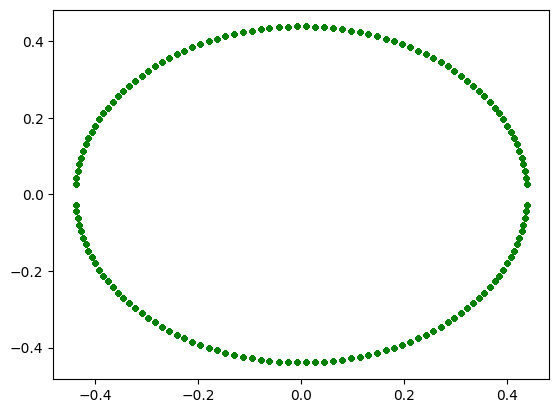

In [18]:
plt.scatter(X_border_train[:, 0], X_border_train[:, 1], marker = '.', color='g')

In [20]:
1/np.sin(0.05)

np.float64(20.00833576452976)

In [16]:
plt.scatter(X_border[:, 0], X_border[:, 1], marker = '.')

NameError: name 'X_border' is not defined

In [123]:
U_border[:, 0] *mean_std['u_std'] + mean_std['u_mean']

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [124]:
pressure = ((U_border[:, 2] *mean_std['p_std'] + mean_std['p_mean'])* ((param_adim["V"] ** 2) * param_adim["rho"])).numpy()

In [125]:
def true_cl(time_init, time_max):
    """
    Args:
        num (int): Le numéro du modèle
        case (int): Le numéro du case
        time_init (float): le temps initial 
        time_max (float): le temps max


    Returns:
        time (np.array):  les valeurs de temps
        cl (np.array): la valeur de cl à ces temps
    """
    df = pd.read_csv(f'results_Cl/model_2_case_2/Cl.csv', index_col=False)
    df_modified = df[((df.iloc[:, 2] > time_init) & (df.iloc[:, 2] < time_max))]
    time = df_modified.iloc[:, 2].to_numpy()
    cl = df_modified.iloc[:, 1].to_numpy()
    return time, cl

In [126]:
t = ((X_border[:, 2] * mean_std['t_std'] + mean_std['t_mean'])*(param_adim['L']/ param_adim['V'])).numpy()
x = ((X_border[:, 0] * mean_std['x_std'] + mean_std['x_mean'])*(param_adim['L'])).numpy()
y = ((X_border[:, 1] * mean_std['y_std'] + mean_std['y_mean'])*(param_adim['L'])).numpy()
pressure = ((U_border[:, 2] * mean_std['p_std'] + mean_std['p_mean']) * ((param_adim["V"] ** 2) * param_adim["rho"])).numpy()


In [127]:
r = 0.025
rho = 1.2
V = 1.

In [128]:
Cl = []
Time = []
for time_ in np.unique(t):
    masque_time = t == time_ 
    theta = np.arctan2(y[masque_time], x[masque_time])
    indice = np.argsort(theta)
    d_theta = theta[indice][1:] - theta[indice][:-1]
    f_portance = np.sum(-pressure[masque_time][indice][1:] * np.sin(theta[indice][1:]) * r * d_theta)
    portance= f_portance / (0.5 * rho * (V**2) * 2 * r)
    Time.append(t[masque_time][indice][0])
    Cl.append(portance)

In [129]:
time_true, cl_true = true_cl(t.min().item(), t.max().item())

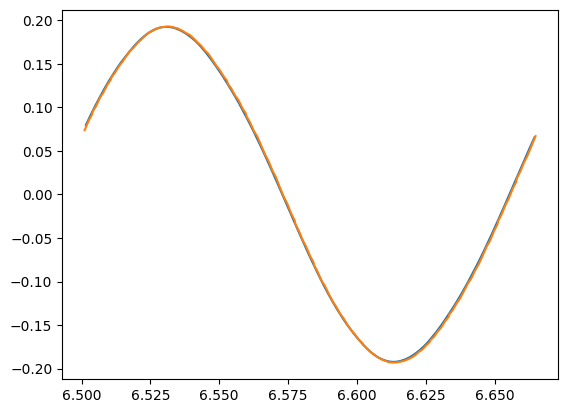

In [130]:
plt.plot(time_true, cl_true)
plt.plot(Time, Cl)

In [135]:
X_border.shape[0] * 0.9

18954.0

In [133]:
X_train.shape

torch.Size([18900, 5])

In [137]:
np.abs(theta).min()

np.float32(0.020138346)

In [139]:
1/np.sin(0.02)

np.float64(50.00333348889545)

In [145]:
df_modified

,Time,Points:0,Points:1,Points:2,Pressure,Velocity:0,Velocity:1,Velocity:2,ya0,w0
5613760,6.50403,-0.008839,0.008839,0.0,-0.096953,0.260876,0.256931,-1.926400e-17,0.0025,38.079883
5613761,6.50403,0.008839,0.008839,0.0,-0.432682,-0.011341,0.011283,2.325450e-18,0.0025,38.079883
5613762,6.50403,0.008839,-0.008839,0.0,-0.331257,-0.023381,-0.023266,-5.405880e-19,0.0025,38.079883
5613763,6.50403,-0.008839,-0.008839,0.0,0.001033,0.262867,-0.257618,2.848800e-17,0.0025,38.079883
5613764,6.50403,-0.055000,0.055000,0.0,0.133940,0.982216,0.109467,-2.346820e-18,0.0025,38.079883
...,...,...,...,...,...,...,...,...,...,...
8460031,9.79286,-0.055128,0.050856,0.0,0.162015,0.975085,0.141714,7.594970e-18,0.0025,38.079883
8460032,9.79286,-0.058912,0.057960,0.0,0.155461,0.983646,0.135179,-4.725340e-19,0.0025,38.079883
8460593,9.79286,0.057986,0.057960,0.0,0.076408,1.103250,0.099903,5.462830e-18,0.0025,38.079883
8462455,9.79286,0.057986,-0.057960,0.0,0.006711,1.049450,0.140738,1.109100e-17,0.0025,38.079883


In [146]:
x = df_modified['Points:0']
y = df_modified['Points:1']

In [154]:
masque = (x**2 + y**2) < (0.03/2)**2

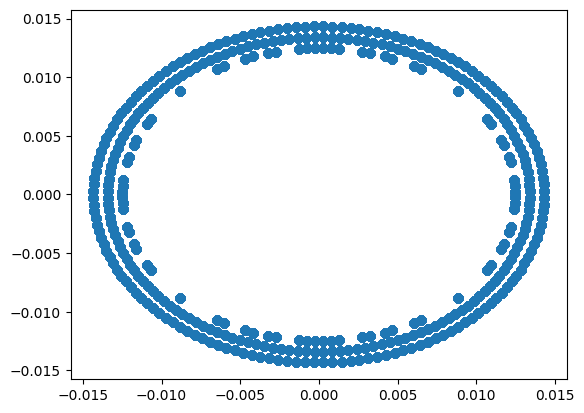

In [155]:
plt.scatter(x[masque], y[masque])

In [54]:
df = pd.read_csv('data/data_john_2_case_2.csv')

In [55]:
df

,Time,Points:0,Points:1,Points:2,Pressure,Velocity:0,Velocity:1,Velocity:2
0,0.0,-0.008839,0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
1,0.0,0.008839,0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
2,0.0,0.008839,-0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
3,0.0,-0.008839,-0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
4,0.0,-0.055000,0.055000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...
12816315,15.0,-0.275005,0.041280,0.001875,0.144976,0.999207,-0.056217,1.361360e-18
12816316,15.0,-0.274663,0.044054,0.001875,0.144602,0.999167,-0.056146,1.099910e-18
12816317,15.0,-0.274302,0.046814,0.001875,0.144226,0.999134,-0.056073,1.372080e-18
12816318,15.0,-0.273921,0.049558,0.001875,0.143846,0.999111,-0.056000,2.077140e-18


In [91]:
r = 0.026/2

In [92]:
df

,Time,Points:0,Points:1,Points:2,Pressure,Velocity:0,Velocity:1,Velocity:2
0,0.0,-0.008839,0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
1,0.0,0.008839,0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
2,0.0,0.008839,-0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
3,0.0,-0.008839,-0.008839,0.000000,0.000000,1.000000,0.000000,0.000000e+00
4,0.0,-0.055000,0.055000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...
12816315,15.0,-0.275005,0.041280,0.001875,0.144976,0.999207,-0.056217,1.361360e-18
12816316,15.0,-0.274663,0.044054,0.001875,0.144602,0.999167,-0.056146,1.099910e-18
12816317,15.0,-0.274302,0.046814,0.001875,0.144226,0.999134,-0.056073,1.372080e-18
12816318,15.0,-0.273921,0.049558,0.001875,0.143846,0.999111,-0.056000,2.077140e-18


In [93]:
df_modified_border = df.loc[
            (df["Points:2"] < 1e-6)
            & (df["Points:0"] ** 2 + df["Points:1"] ** 2 < r ** 2)
            & (df["Time"] > 6.),
            :,
        ].copy()





In [94]:
import matplotlib.pyplot as plt

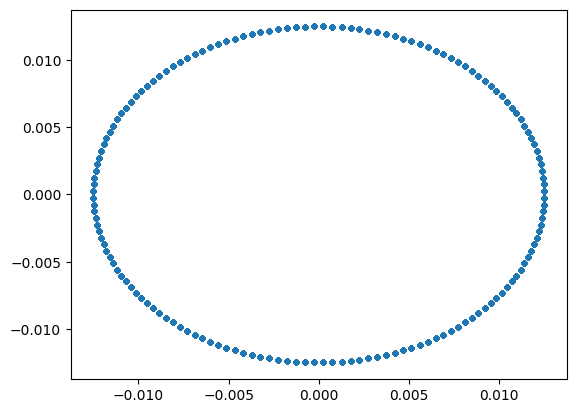

In [95]:
plt.scatter(df_modified_border['Points:0'].to_numpy(), df_modified_border['Points:1'].to_numpy(), marker='.')